In [ ]:
import tarfile
import os
import urllib.request

# URL of the dataset
datasetURL = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
datasetFilename = "aclImdb_v1.tar.gz"

# Download the dataset
if not os.path.exists(datasetFilename):
    urllib.request.urlretrieve(datasetURL, datasetFilename)

# Extract the dataset
with tarfile.open(datasetFilename, 'r:gz') as tar:
    tar.extractall()

In [2]:
import os
import pandas as pd

def loadData(data_dir):
    texts = []
    labels = []
    for label in ['pos', 'neg']:
        label_dir = os.path.join(data_dir, label)
        for filename in os.listdir(label_dir):
            if filename.endswith('.txt'):
                with open(os.path.join(label_dir, filename), 'r', encoding='utf-8') as file:
                    text = file.read()
                    texts.append(text)
                    labels.append(label)
    return pd.DataFrame({'text': texts, 'label': labels})



data_dir = 'aclImdb/train'  # Change this to the appropriate folder
df = loadData(data_dir)

data_dir = 'aclImdb/test'  # Change this to the appropriate folder
dftest = loadData(data_dir)

In [3]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Fit the encoder to the labels and transform the 'label' column
df['label_encoded'] = label_encoder.fit_transform(df['label'])
dftest['label_encoded'] = label_encoder.fit_transform(dftest['label'])

# Now, 'label_encoded' contains numerical representations of the labels


In [ ]:
df.head()

In [ ]:
print(dftest)

In [ ]:
df['label'].unique()

In [ ]:
print(dftest)

In [4]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", 
             "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 
             'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 
             'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 
             'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 
             "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 
             'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 
             'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 
             'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 
             'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 
             'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 
             'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
             'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
             'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't',
             'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm',
             'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', 
             "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', 
             "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
import nltk

nltk.download()

In [5]:
import re

def preprocess(text):
    # remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    text = re.sub('<br />', '', text) 
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]','', text) 
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text


In [95]:
trainDataPreprocess = df.copy()
trainDataPreprocess['text'] = trainDataPreprocess['text'].apply(preprocess)
print(trainDataPreprocess['text']);

0        bromwell high cartoon comedy ran time programs...
1        homelessness houselessness george carlin state...
2        brilliant overacting lesley ann warren best dr...
3        easily underrated film inn brooks cannon sure ...
4        typical mel brooks film much less slapstick mo...
                               ...                        
24995    towards end movie felt technical felt like cla...
24996    kind movie enemies content watch time bloody t...
24997    saw descent last night stockholm film festival...
24998    films pick pound turn rather good 23rd century...
24999    one dumbest films ive ever seen rips nearly ev...
Name: text, Length: 25000, dtype: object


In [ ]:
print(trainDataPreprocess)

In [9]:
import pandas as pd
from sklearn.utils import shuffle


trainDataPreprocess = shuffle(trainDataPreprocess)
trainDataPreprocess.reset_index(drop=True, inplace=True)
print(trainDataPreprocess.head())

                                                text label  label_encoded
0  scientist girl friend driving speeding causes ...   neg              0
1  hearing praise play decided watch stumbled acr...   neg              0
2  far worse awful laurel hardy cartoons 60s terr...   neg              0
3  mom recently become addicted show laughing but...   pos              1
4  fact young people distasteful couldnt wait em ...   neg              0


In [10]:
testDataPreprocess = dftest.copy()
testDataPreprocess['text'] = testDataPreprocess['text'].apply(preprocess)

import pandas as pd
from sklearn.utils import shuffle


testDataPreprocess = shuffle(testDataPreprocess)
testDataPreprocess.reset_index(drop=True, inplace=True)
print(testDataPreprocess.head())

                                                text label  label_encoded
0  say grainy poorly filmed 16mm stag film best a...   neg              0
1  spite highminded ambitions zurlinis film must ...   neg              0
2  watched fair bit bollywood films growing know ...   pos              1
3  taking cues backwoods classics deliverance tex...   pos              1
4  illconceived sequelthe absurd idea killer snow...   neg              0


In [96]:
import re
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()
# Define a function to remove HTML tags
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    clean = [stemmer.lemmatize(word) for word in text]
    clean = ' '.join(clean)
    return re.sub(clean, '', text)

# Apply the function to the 'text' column
trainDataPreprocess['text'] = trainDataPreprocess['text'].apply(remove_html_tags)
testDataPreprocess['text'] = testDataPreprocess['text'].apply(remove_html_tags)


In [97]:
trainDataPreprocess['text']

0        bromwell high cartoon comedy ran time programs...
1        homelessness houselessness george carlin state...
2        brilliant overacting lesley ann warren best dr...
3        easily underrated film inn brooks cannon sure ...
4        typical mel brooks film much less slapstick mo...
                               ...                        
24995    towards end movie felt technical felt like cla...
24996    kind movie enemies content watch time bloody t...
24997    saw descent last night stockholm film festival...
24998    films pick pound turn rather good 23rd century...
24999    one dumbest films ive ever seen rips nearly ev...
Name: text, Length: 25000, dtype: object

In [ ]:
uniqueWords = set(trainDataPreprocess['text'])
countUnique = len(uniqueWords)
print(countUnique)

In [ ]:
df_combined = pd.concat([df, dftest], ignore_index=True)

In [ ]:
df_combined['label'].unique()

In [98]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
uniqueWords = set(dataTrain)
countUnique = len(uniqueWords)
print(countUnique)

In [156]:
from collections import Counter


max_features = 10000
# ----- Get top 10000 most occuring words in list-----
results = Counter()
trainDataPreprocess['text'].str.split().apply(results.update)
vocabulary = [key[0] for key in results.most_common(max_features)]

# ----- Create tokenizer based on your top 10000 words -----
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(vocabulary)

In [157]:
y = np.int32(trainDataPreprocess.label.astype('category').cat.codes.to_numpy())
# ----- Get number of classes -----
num_classes = np.unique(y).shape[0]
print(y)


ytest = np.int32(testDataPreprocess.label.astype('category').cat.codes.to_numpy())
# ----- Get number of classes -----
num_classes = np.unique(ytest).shape[0]
print(ytest)

[1 1 1 ... 0 0 0]
[0 0 1 ... 0 1 0]


In [158]:
combined_data = pd.concat([trainDataPreprocess['text'], testDataPreprocess['text']], ignore_index=True)
print(combined_data)

0        bromwell high cartoon comedy ran time programs...
1        homelessness houselessness george carlin state...
2        brilliant overacting lesley ann warren best dr...
3        easily underrated film inn brooks cannon sure ...
4        typical mel brooks film much less slapstick mo...
                               ...                        
49995    haggard doesnt even need graded since never de...
49996    salena incident set arizona six death row inma...
49997    terrible moovie fun many levels moost obvious ...
49998    brother got hooked carlin back 70s always love...
49999    although many billie dove fans delighted work ...
Name: text, Length: 50000, dtype: object


In [159]:
X = tokenizer.texts_to_sequences(trainDataPreprocess['text'].values)
X = pad_sequences(X)
print(X)

Xtest = tokenizer.texts_to_sequences(testDataPreprocess['text'].values)
Xtest = pad_sequences(Xtest)
print(Xtest)

[[   0    0    0 ... 8750 2163  108]
 [   0    0    0 ... 5823  223  271]
 [   0    0    0 ...   12   82  283]
 ...
 [   0    0    0 ...   15    2   18]
 [   0    0    0 ...   24 1039  664]
 [   0    0    0 ...  315    9 1192]]
[[   0    0    0 ... 1429 4471 9311]
 [   0    0    0 ... 3084 4002   70]
 [   0    0    0 ...  119   12  200]
 ...
 [   0    0    0 ... 2394  150 1000]
 [   0    0    0 ...  666   29 1903]
 [   0    0    0 ...  252 1927    3]]


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [161]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import re
from nltk.stem import WordNetLemmatizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [162]:
output_dim = 16
max_input_lenght = X.shape[1]


# In[11]:


# ----- Define model -----
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=max_features, 
                                    output_dim=output_dim, input_length=max_input_lenght))
model.add(Conv1D(128, 5, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# ----- Compile model -----
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(1e-4), metrics=["accuracy"])

In [163]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 1132, 16)          160000    
                                                                 
 conv1d_23 (Conv1D)          (None, 1128, 128)         10368     
                                                                 
 dropout_23 (Dropout)        (None, 1128, 128)         0         
                                                                 
 global_average_pooling1d_22  (None, 128)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_46 (Dense)            (None, 16)                2064      
                                                                 
 dense_47 (Dense)            (None, 2)                 34        
                                                     

In [164]:
history_1 = model.fit(X_train, y_train,batch_size=8,epochs=7, validation_data=(X_val, y_val))

Epoch 1/7
2000/2000 [==============================] - 33s 16ms/step - loss: 0.6926 - accuracy: 0.5098 - val_loss: 0.6862 - val_accuracy: 0.5938
Epoch 2/7
2000/2000 [==============================] - 25s 12ms/step - loss: 0.6047 - accuracy: 0.7389 - val_loss: 0.5102 - val_accuracy: 0.7793
Epoch 3/7
2000/2000 [==============================] - 24s 12ms/step - loss: 0.4188 - accuracy: 0.8427 - val_loss: 0.3844 - val_accuracy: 0.8608
Epoch 4/7
2000/2000 [==============================] - 25s 13ms/step - loss: 0.3128 - accuracy: 0.8849 - val_loss: 0.3360 - val_accuracy: 0.8643
Epoch 5/7
2000/2000 [==============================] - 24s 12ms/step - loss: 0.2606 - accuracy: 0.9041 - val_loss: 0.3231 - val_accuracy: 0.8635
Epoch 6/7
2000/2000 [==============================] - 26s 13ms/step - loss: 0.2262 - accuracy: 0.9184 - val_loss: 0.3076 - val_accuracy: 0.8830
Epoch 7/7
2000/2000 [==============================] - 25s 12ms/step - loss: 0.2017 - accuracy: 0.9285 - val_loss: 0.3052 - val_ac

In [166]:
probabilities = model.predict(X_test)

pred = np.argmax(probabilities, axis=1)

print(" ")
print("Results")

accuracy = accuracy_score(y_test, pred)
accuracy = round(accuracy,1)

print('Accuracy: {:.2f}'.format(accuracy))
print(" ")
print(classification_report(y_test, pred))

157/157 [==============================] - 2s 10ms/step
 
Results
Accuracy: 0.90
 
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2485
           1       0.89      0.89      0.89      2515

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



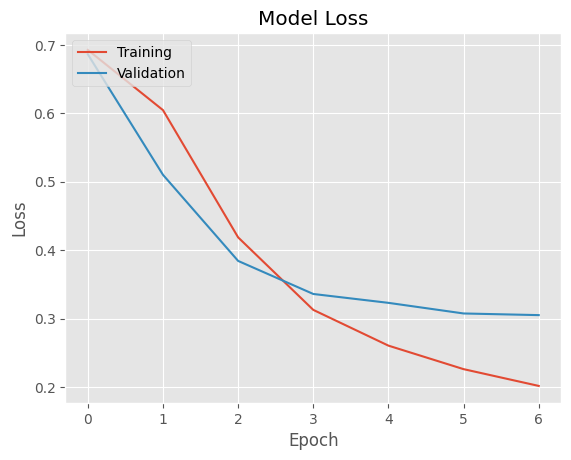

In [167]:
from matplotlib import pyplot as plt
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

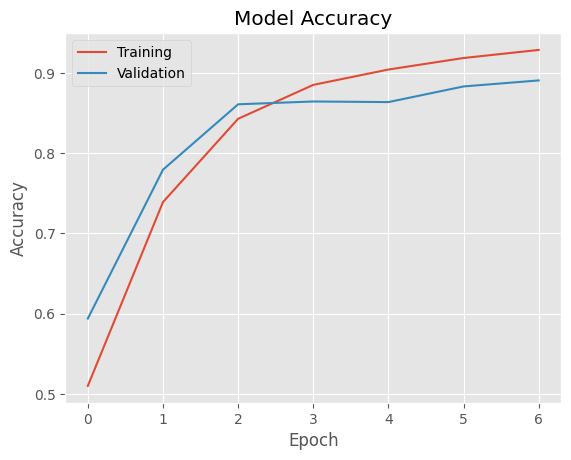

In [168]:
from matplotlib import pyplot as plt
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()